In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('churn_PU.csv')
df.head(10)

,YES,BIGSUM,Transact,AVER_T,AV_PER,MONTH,CASES,NEGATIVE,EM_CLASS,L_MONTH
0,1,130518.0,164317.0,192.289149,35.730559,9.0,0.0,6.0,0.0,33.0
1,1,37000.0,52000.0,183.299916,NaN,2.0,0.0,1.0,0.0,6.0
2,1,23200.0,38666.0,162.366667,NaN,11.0,0.0,0.0,0.0,14.0
3,1,19400.0,20494.0,95.933333,NaN,5.0,0.0,0.0,0.0,9.0
4,1,61584.0,61800.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
5,1,41900.0,52490.0,72.033333,NaN,3.0,0.0,0.0,2.0,4.0
6,0,83700.0,111800.0,192.733333,NaN,6.0,0.0,0.0,1.0,28.0
7,0,61327.0,76484.0,202.510775,41.516390,9.0,NaN,2.0,0.0,25.0
8,0,100693.0,114743.0,88.470452,29.393543,6.0,0.0,0.0,0.0,14.0
9,1,48507.0,61000.0,97.400000,NaN,13.0,1.0,4.0,0.0,17.0


In [4]:
df.describe()

,YES,BIGSUM,Transact,AVER_T,AV_PER,MONTH,CASES,NEGATIVE,EM_CLASS,L_MONTH
count,5901.000000,5391.000000,5794.000000,5598.000000,4678.000000,5392.000000,5201.000000,5325.000000,5395.000000,5683.000000
mean,0.193865,73987.997255,102132.152233,180.193462,33.786950,8.925677,0.253605,0.444883,1.186840,21.353862
std,0.395358,44496.426792,57424.726446,85.831086,8.584762,7.580436,0.845633,1.109270,1.724094,10.132920
min,0.000000,2063.000000,8000.000000,0.000000,0.720295,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,46515.000000,66350.500000,115.368833,29.121090,3.000000,0.000000,0.000000,0.000000,15.000000
50%,0.000000,65206.000000,89594.500000,173.714635,34.817611,7.000000,0.000000,0.000000,1.000000,20.000000
75%,0.000000,91693.500000,120158.750000,232.013712,39.006652,13.000000,0.000000,0.000000,2.000000,26.000000
max,1.000000,399550.000000,855909.000000,1168.233561,203.312149,41.000000,10.000000,13.000000,17.000000,71.000000


In [5]:
df_less_missing_rows.info()

NameError: name 'df_less_missing_rows' is not defined

In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропущено', 1 : '% от общего количества'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от общего количества', ascending=False).round(1)
        print ("Датафрейм имеет " + str(df.shape[1]) + " колонок.\n"      
            "Всего " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок имеют пропуски значений.")
        return mis_val_table_ren_columns   

missing_values_table(df)

Датафрейм имеет 10 колонок.
Всего 9 колонок имеют пропуски значений.


,Пропущено,% от общего количества
AV_PER,1223,20.7
CASES,700,11.9
NEGATIVE,576,9.8
BIGSUM,510,8.6
MONTH,509,8.6
EM_CLASS,506,8.6
AVER_T,303,5.1
L_MONTH,218,3.7
Transact,107,1.8


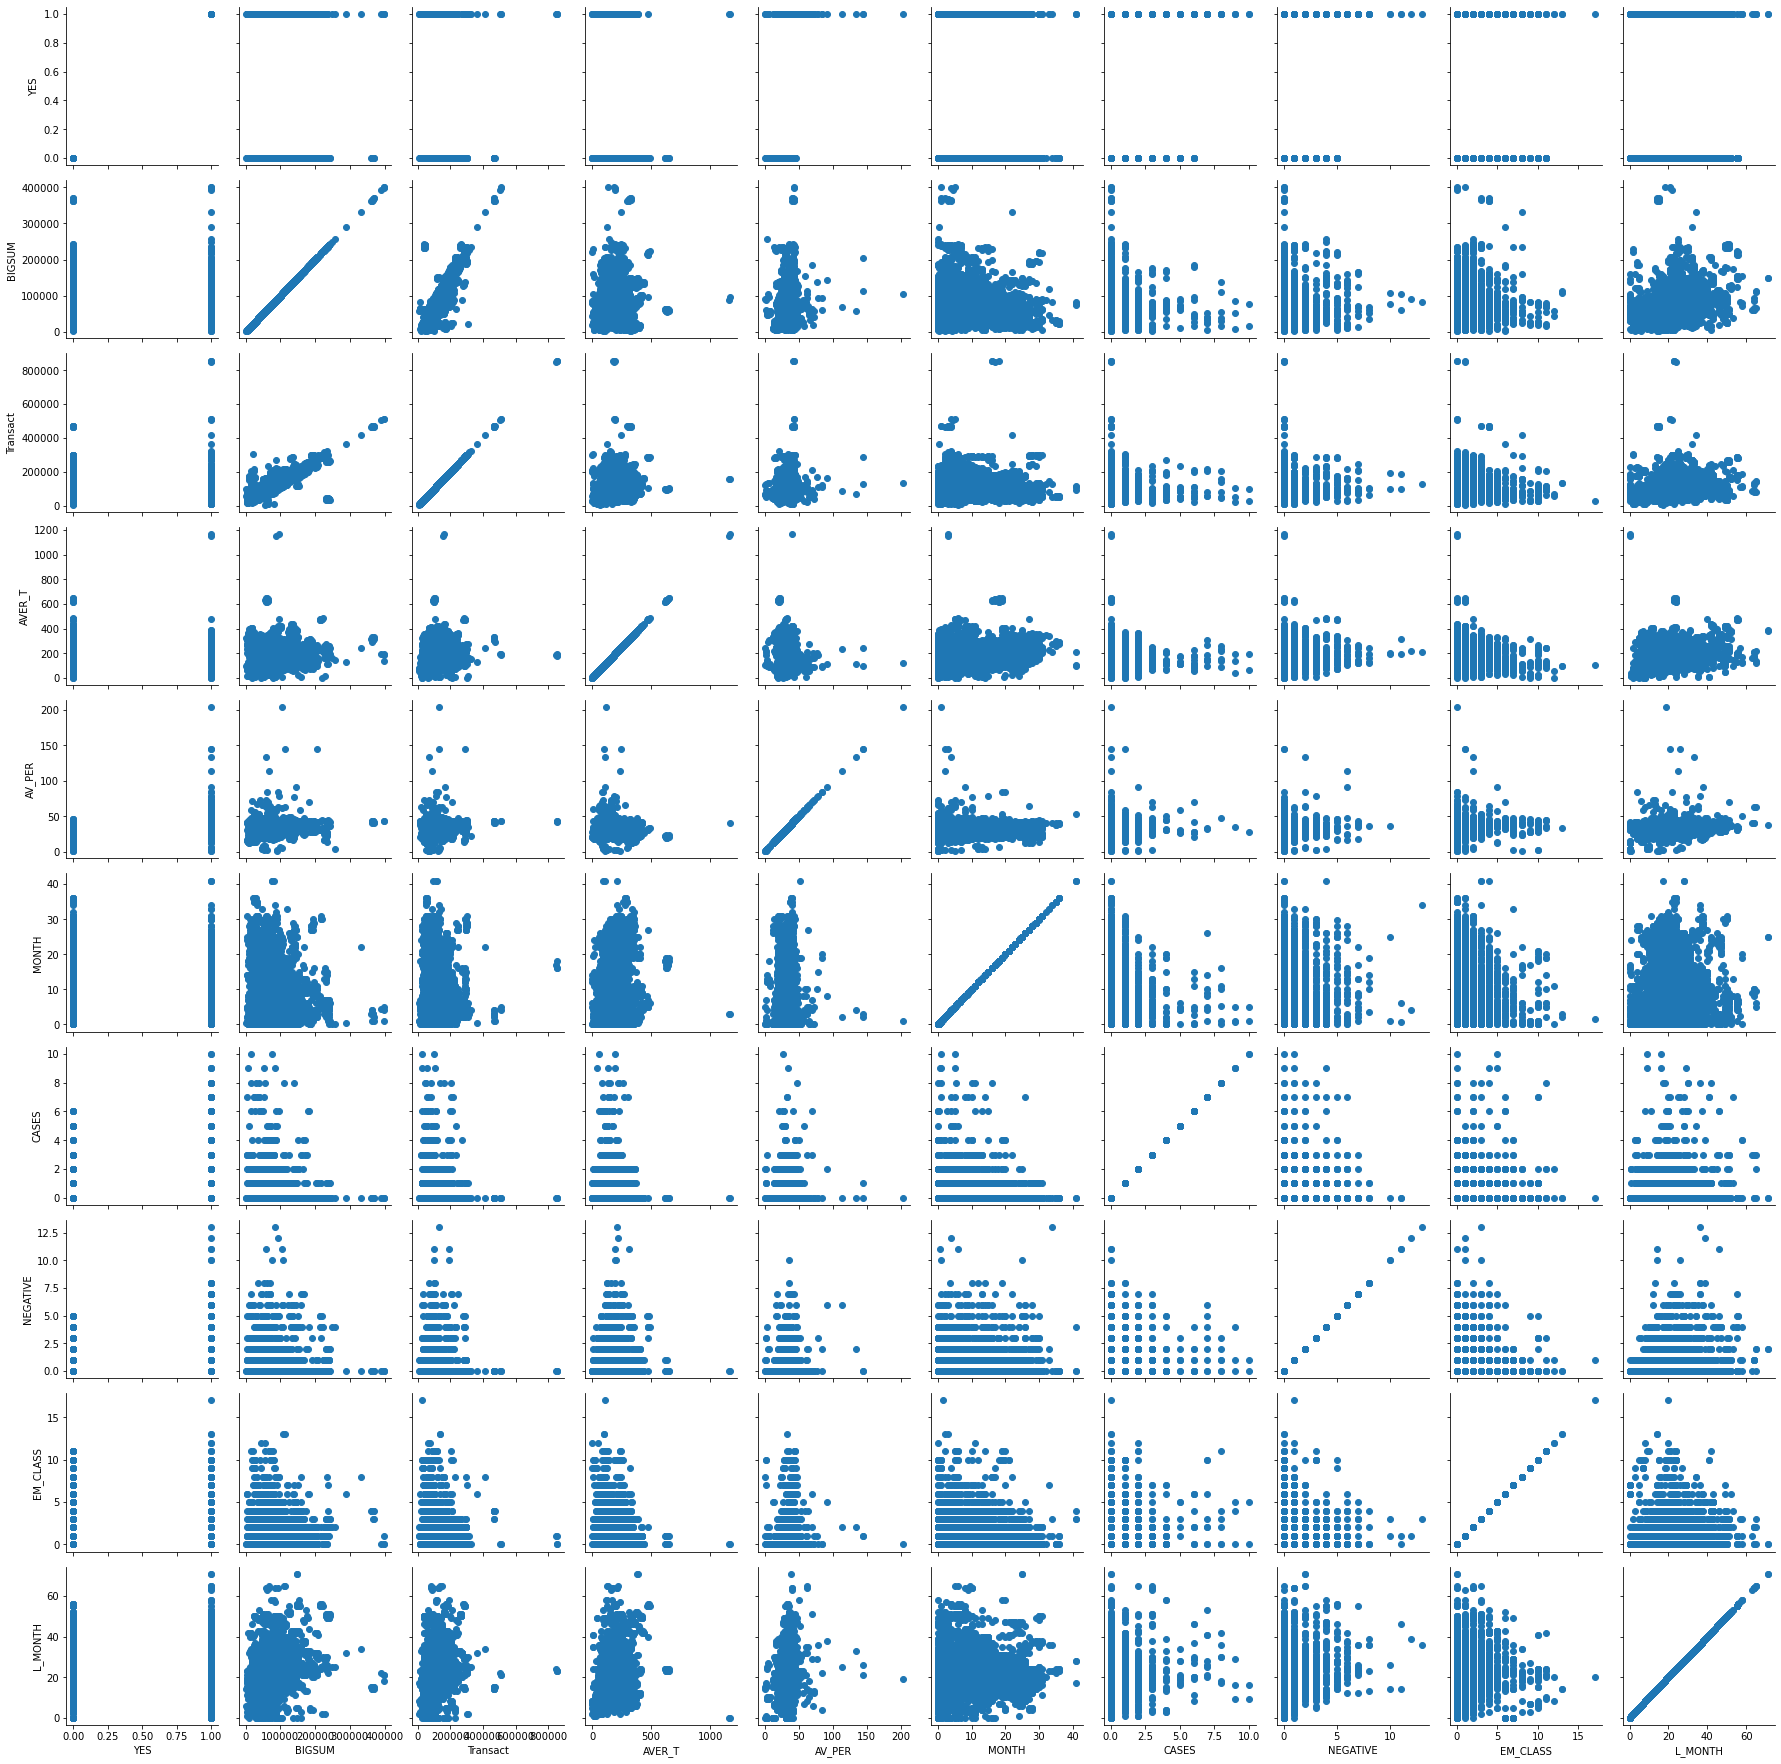

In [7]:
pair_grid_plot = sns.PairGrid(df)
pair_grid_plot.map(plt.scatter)

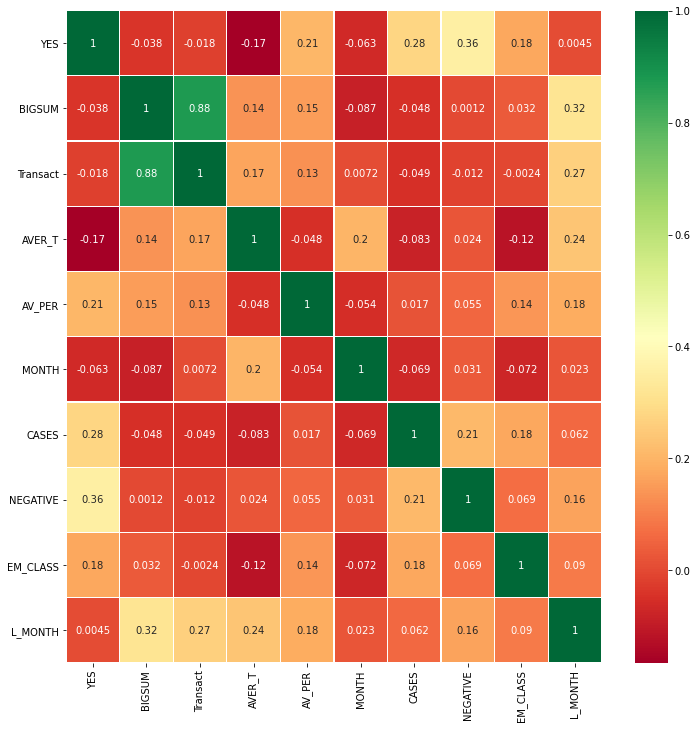

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()